# Health poverty and education indicators for Nepal districts

### Imports

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
import geopandas as gpd
from branca.colormap import linear
import json

# Custom util functions
import sys; sys.path.append("./libraries/")
from libraries.utils import *

### Basic Exploration

In [2]:
gdf = gpd.read_file("../data/nepal.shp")

In [3]:
print(gdf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 62 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          75 non-null     int64   
 1   name_1      71 non-null     object  
 2   name_2      75 non-null     object  
 3   district    75 non-null     object  
 4   depecprov   75 non-null     float64 
 5   povindex    75 non-null     float64 
 6   pcinc       75 non-null     int64   
 7   pcincppp    75 non-null     int64   
 8   pcincmp     75 non-null     int64   
 9   malkids     75 non-null     float64 
 10  lif40       75 non-null     float64 
 11  nosafh20    75 non-null     float64 
 12  population  75 non-null     int64   
 13  boyg1_5     75 non-null     int64   
 14  girlg1_5    75 non-null     int64   
 15  kids1_5     75 non-null     int64   
 16  schoolcnt   75 non-null     int64   
 17  schlpkid    75 non-null     float64 
 18  schlppop    75 non-null     float64 
 19  ad

In [4]:
print(gdf.head())

   id   name_1       name_2   district  depecprov  povindex  pcinc  pcincppp  \
0   1     None  Dhaualagiri    Baglung      27.01     27.33    354       573   
1   2     None  Dhaualagiri    Mustang      31.51     31.16   1189      1922   
2   3     None  Dhaualagiri     Myagdi      30.03     28.54    636      1028   
3   4     None  Dhaualagiri     Parbat      21.84     24.62    627      1013   
4   5  Central      Bagmati  Bhaktapur      22.58     19.43    854      1379   

   pcincmp  malkids  ...  HEALTDAMT  HUMDAMT  INDDAMT  MULTDAMT  SOCDAMT  \
0    25613     42.9  ...    3584409   172736   369324   8050858  1308661   
1    85957     54.7  ...    2253911   172736        0   3712798   633763   
2    45986     47.5  ...    2279653   172736   369324  11784759   964089   
3    45289     26.2  ...      26574        0   369324   4741985        0   
4    61686     26.9  ...    1338957   172736        0   2421424  1652237   

   TOURDAMT  TRANDAMT   WATDAMT   TOTDAMT  \
0         0     1

In [5]:
print(gdf.columns)

Index(['id', 'name_1', 'name_2', 'district', 'depecprov', 'povindex', 'pcinc',
       'pcincppp', 'pcincmp', 'malkids', 'lif40', 'nosafh20', 'population',
       'boyg1_5', 'girlg1_5', 'kids1_5', 'schoolcnt', 'schlpkid', 'schlppop',
       'ad_illit', 'ad_ilgt50', 'lon', 'lat', 'AGCAMT', 'BANKCAMT', 'BUDGCAMT',
       'COMMCAMT', 'CONCAMT', 'EDUCAMT', 'ENGYCAMT', 'ENVCAMT', 'FORCAMT',
       'GOVCAMT', 'HEALTCAMT', 'HUMCAMT', 'INDCAMT', 'MULTCAMT', 'SOCCAMT',
       'TOURCAMT', 'TRANCAMT', 'WATCAMT', 'TOTCAMT', 'AGDAMT', 'BANKDAMT',
       'BUDGDAMT', 'COMMDAMT', 'CONDAMT', 'EDUDAMT', 'ENGYDAMT', 'ENVDAMT',
       'FORDAMT', 'GOVDAMT', 'HEALTDAMT', 'HUMDAMT', 'INDDAMT', 'MULTDAMT',
       'SOCDAMT', 'TOURDAMT', 'TRANDAMT', 'WATDAMT', 'TOTDAMT', 'geometry'],
      dtype='object')


In [6]:
print(gdf.geometry)

0     POLYGON ((83.10834 28.6202, 83.1056 28.60976, ...
1     POLYGON ((83.99726 29.31675, 84 29.31576, 84 2...
2     POLYGON ((83.50688 28.79306, 83.51024 28.78809...
3     POLYGON ((83.70261 28.39837, 83.70435 28.39452...
4     POLYGON ((85.52173 27.71822, 85.52359 27.71375...
                            ...                        
70    POLYGON ((83.02333 28.10508, 83.02967 28.09924...
71    POLYGON ((83.19185 28.26453, 83.20638 28.25558...
72    POLYGON ((84.10302 27.86387, 84.09755 27.85927...
73    POLYGON ((83.37988 27.95869, 83.37875 27.95583...
74    POLYGON ((83.30704 27.76594, 83.31587 27.76234...
Name: geometry, Length: 75, dtype: geometry


In [7]:
print(gdf.geom_type.value_counts()) 

Polygon    75
Name: count, dtype: int64


In [8]:
print(gdf.is_valid.value_counts())

True    75
Name: count, dtype: int64


In [9]:
print(gdf.crs)

EPSG:4326


In [10]:
gdf_proj = gdf.to_crs(epsg=32645)

In [11]:
gdf_merc = gdf.to_crs(epsg=3857)

In [12]:
geojson = json.loads(gdf_proj.to_json())

<Axes: >

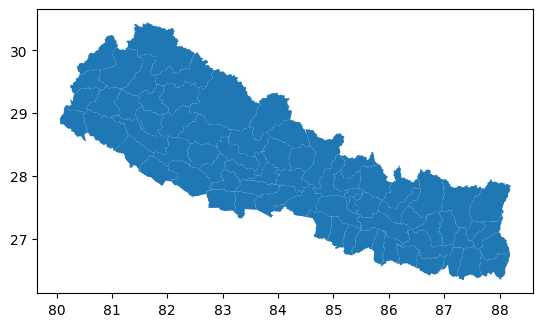

In [13]:
#checking if we have the correct map
gdf.plot()

## Choropleth maps

### Univariate Choropleth Maps

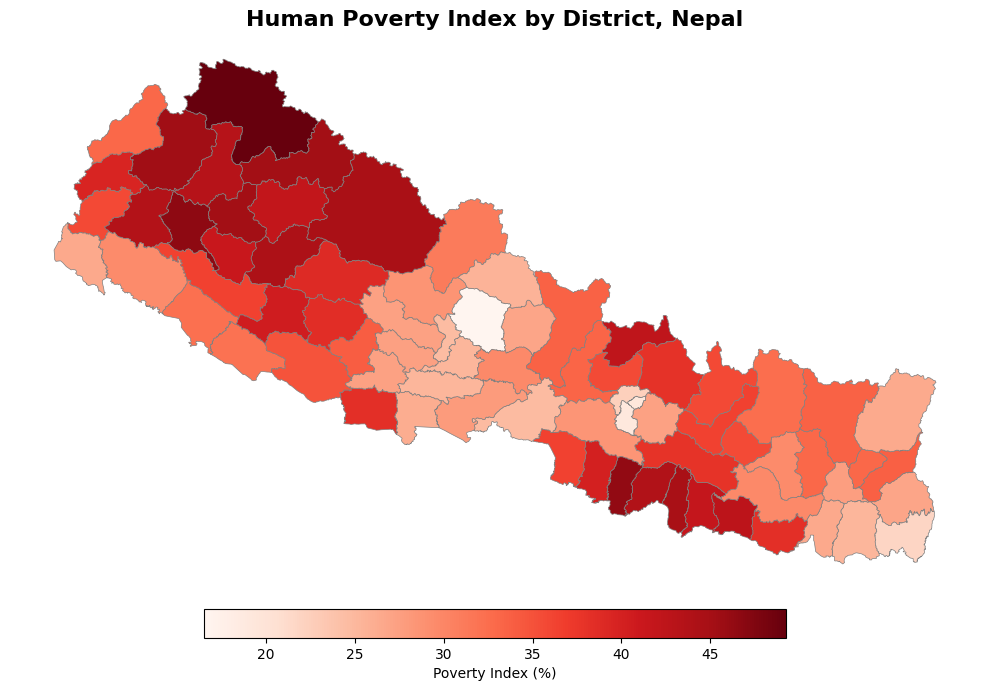

In [14]:
choropleth_mapping(gdf, variables="povindex", title="Human Poverty Index by District, Nepal", legend_label="Poverty Index (%)")

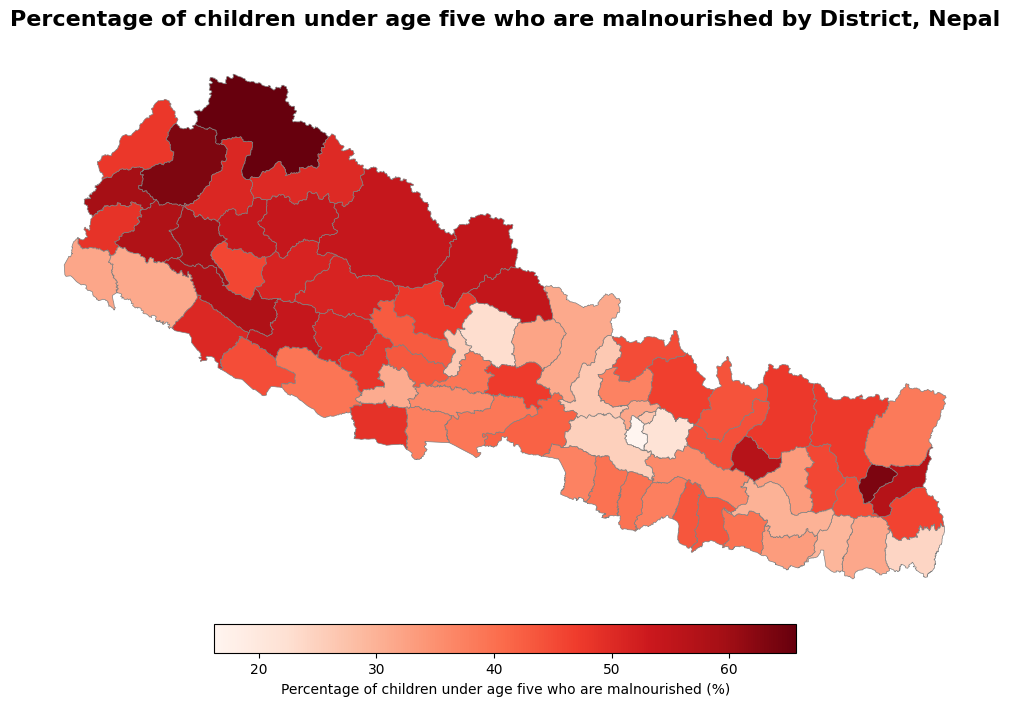

In [15]:
choropleth_mapping(gdf, variables="malkids", title="Percentage of children under age five who are malnourished by District, Nepal", legend_label="Percentage of children under age five who are malnourished (%)")

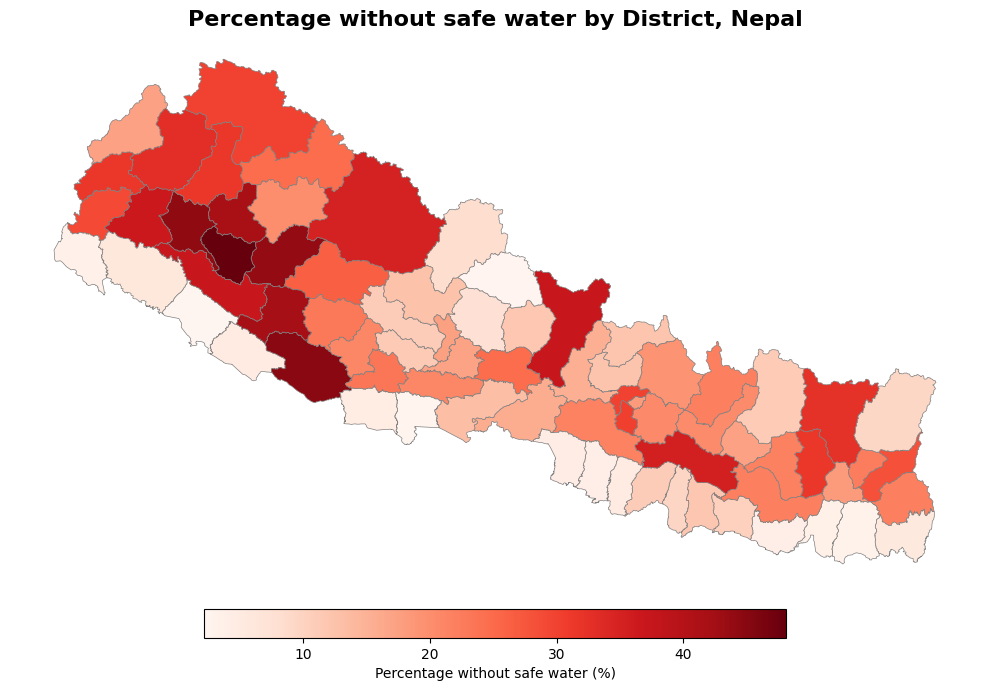

In [16]:
choropleth_mapping(gdf, variables="nosafh20", title="Percentage without safe water by District, Nepal", legend_label="Percentage without safe water (%)")

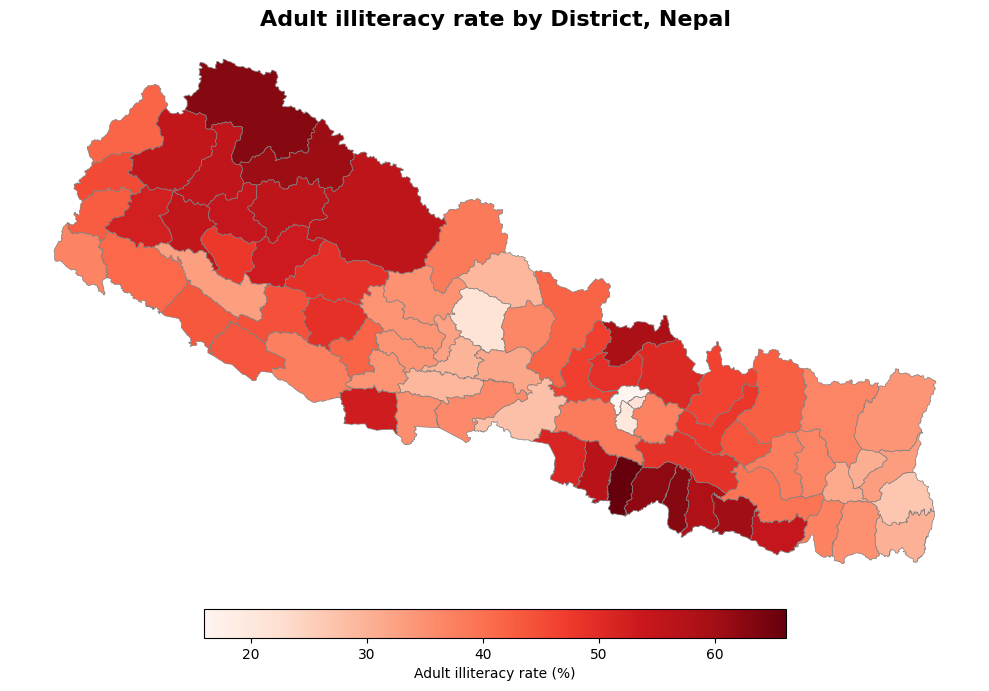

In [17]:
choropleth_mapping(gdf, variables="ad_illit", title="Adult illiteracy rate by District, Nepal", legend_label="Adult illiteracy rate (%)")

### Bivariate Choropleth Maps

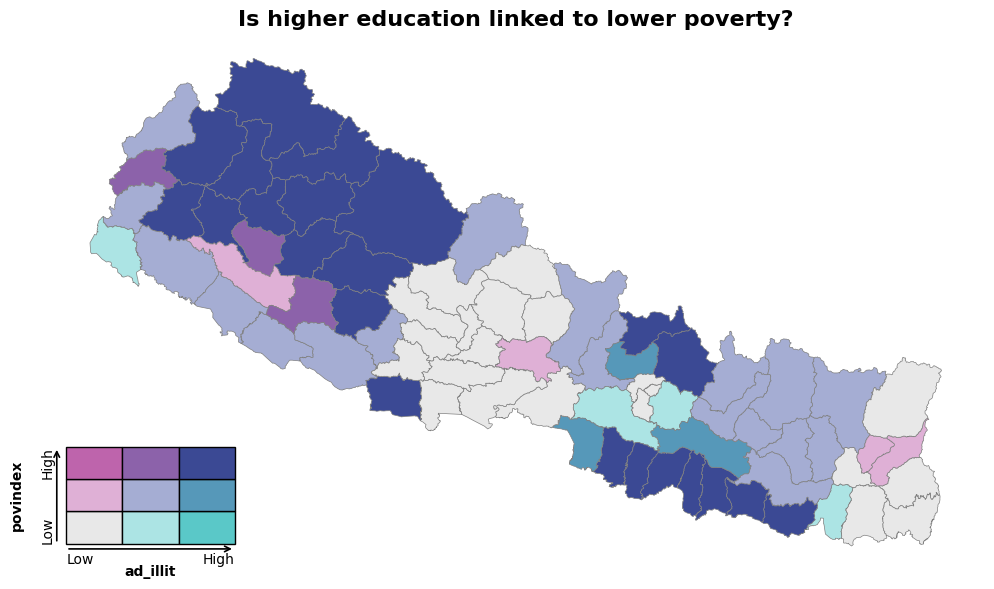

In [18]:
# bivariate choropleth map - Education vs Poverty
choropleth_mapping(gdf, variables=("ad_illit", "povindex"), title="Is higher education linked to lower poverty?")

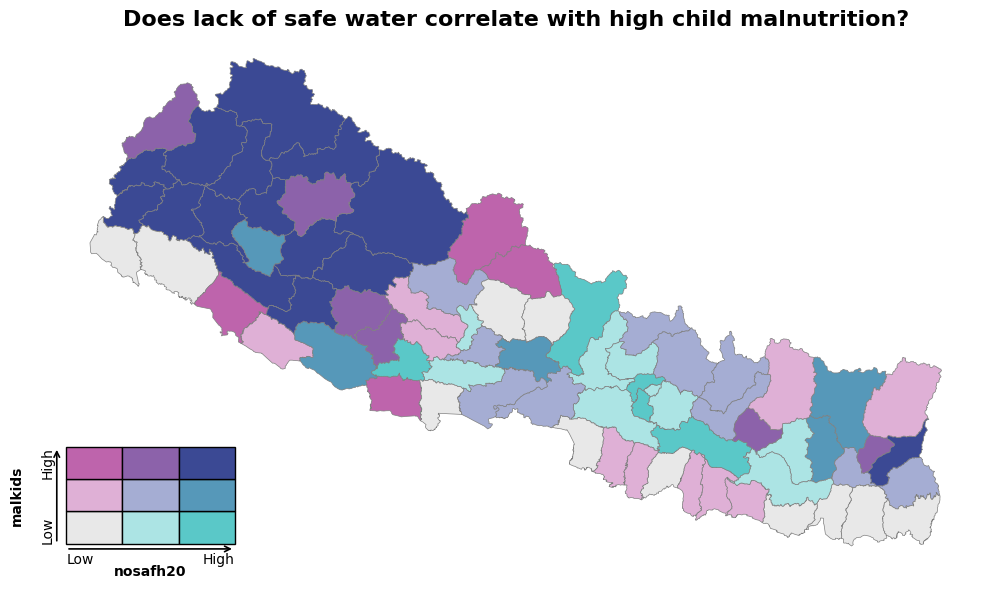

In [19]:
# bivariate choropleth map - Safe Water vs Malnutrition
choropleth_mapping(gdf, variables=("nosafh20", "malkids"), title="Does lack of safe water correlate with high child malnutrition?")

### Pearson’s r and	p-value

In [20]:
r_ep, p_ep = pearson_report(gdf, "ad_illit", "povindex")
print(f"Adult Illiteracy vs Poverty: r = {r_ep:.2f}, p = {p_ep:.4f}")

r_wm, p_wm = pearson_report(gdf, "nosafh20", "malkids")
print(f"Lack of Safe Water vs Child Malnutrition: r = {r_wm:.2f}, p = {p_wm:.4f}")

Adult Illiteracy vs Poverty: r = 0.92, p = 0.0000
Lack of Safe Water vs Child Malnutrition: r = 0.36, p = 0.0017


### Lowest and Higest values for some Variables

In [21]:
bottom5, top5 = extreme_value_variables(gdf, "povindex", n=5)

Lowest 5 districts by povindex:
  Kaski: 16.50
  Lalitpur: 19.18
  Bhaktapur: 19.43
  Jhapa: 21.82
  Kathmandu: 22.45

Highest 5 districts by povindex:
  Humla: 49.26
  Achham: 46.68
  Rautahat: 46.43
  Bajhang: 45.32
  Mugu: 45.22


In [22]:
bottom5, top5 = extreme_value_variables(gdf, "malkids", n=5)

Lowest 5 districts by malkids:
  Lalitpur: 16.20
  Kavrepalanchok: 21.70
  Kaski: 22.90
  Jhapa: 24.20
  Makwanpur: 25.10

Highest 5 districts by malkids:
  Humla: 65.70
  Terhathum: 63.40
  Bajhang: 63.20
  Baitadi: 59.20
  Achham: 59.20


In [23]:
bottom5, top5 = extreme_value_variables(gdf, "nosafh20", n=5)

Lowest 5 districts by nosafh20:
  Bardiya: 2.14
  Manang: 2.42
  Rupandehi: 2.50
  Morang: 3.08
  Kanchanpur: 3.32

Highest 5 districts by nosafh20:
  Dailekh: 48.12
  Dang: 44.72
  Achham: 44.31
  Jajarkot: 43.91
  Salyan: 42.19


In [24]:
bottom5, top5 = extreme_value_variables(gdf, "ad_illit", n=5)

Lowest 5 districts by ad_illit:
  Kathmandu: 15.96
  Lalitpur: 20.32
  Kaski: 21.43
  Bhaktapur: 21.87
  Ilam: 26.54

Highest 5 districts by ad_illit:
  Rautahat: 66.11
  Mahottari: 62.96
  Humla: 62.78
  Sarlahi: 62.00
  Mugu: 60.75
